In [117]:
import numpy as np
from math import *
from matplotlib import pyplot as plt
import random
from scipy.signal import butter, filtfilt
from scipy.ndimage import gaussian_filter1d

In [118]:
def gauss(x, sigma):
    return np.exp(-(x ** 2) / (sigma ** 2))

In [119]:
def impulse_noise(size, N, mult):
    step = floor(size / N)
    y = np.zeros(size)
    for i in range(0, floor(N / 2)):
        y[round(size / 2) + i * step] = mult * (0.5 + random.random())
        y[round(size / 2) - i * step] = mult * (0.5 + random.random())
    return y

In [120]:
def gauss_filter(sigma, size, tp):
    x = np.linspace(-size / 2, size / 2, size)
    
    if tp == 'low':
        y = np.exp(-x ** 2 / (2 * sigma ** 2))
    elif tp == 'high':
        y = 1 - np.exp(-x ** 2 / (2 * sigma ** 2))
    else:
        y = x * sum(x)
    
    return y / sum(y)

In [121]:
T = 5
dt = 0.005

sigma = 1

t = np.arange(-T, T, dt, dtype='complex_')

In [122]:
gy = [gauss(i, sigma) for i in t]

In [123]:
gnoise = np.random.normal(0, 0.05, len(t))

gyng = gy + gnoise

In [124]:
inoise = impulse_noise(len(t), 25, 0.4)

gyni = gy + inoise

In [125]:
b, a = butter(6, 0.05, btype='low', analog=False)

gyng_bf = filtfilt(b, a, gyng)
gyni_bf = filtfilt(b, a, gyni)

In [126]:
G = gauss_filter(4, 20, 'low')

gyng_gf = filtfilt(G, 1, gyng)
gyni_gf = filtfilt(G, 1, gyni)

c:\users\andrey\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\users\andrey\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\users\andrey\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


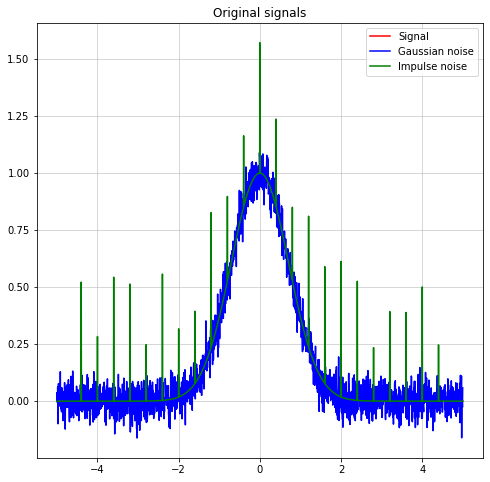

In [127]:
figure, ax = plt.subplots(figsize=(8, 8))
ax.grid(linewidth=0.5)
plt.title('Original signals')
plt.plot(t, gy, color='r', label='Signal')
plt.plot(t, gyng, color='b', label='Gaussian noise')
plt.plot(t, gyni, color='g', label='Impulse noise')
plt.legend()

c:\users\andrey\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\users\andrey\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


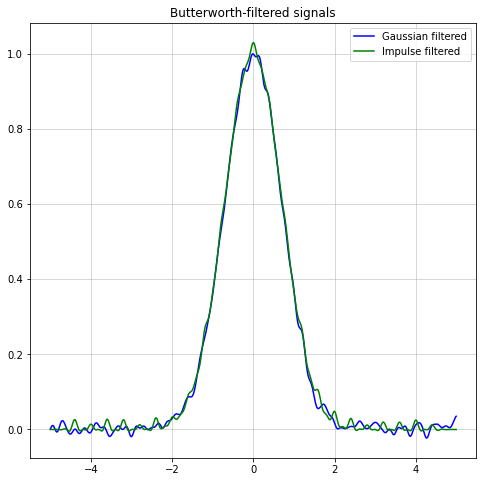

In [128]:
figure, ax = plt.subplots(figsize=(8, 8))
ax.grid(linewidth=0.5)
plt.title('Butterworth-filtered signals')
plt.plot(t, gyng_bf, color='b', label='Gaussian filtered')
plt.plot(t, gyni_bf, color='g', label='Impulse filtered')
plt.legend()

c:\users\andrey\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\users\andrey\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


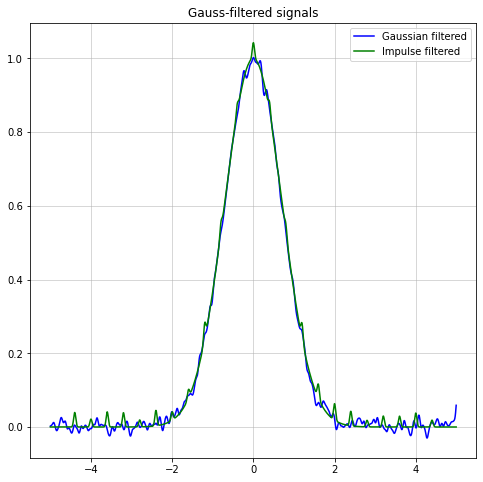

In [129]:
figure, ax = plt.subplots(figsize=(8, 8))
ax.grid(linewidth=0.5)
plt.title('Gauss-filtered signals')
plt.plot(t, gyng_gf, color='b', label='Gaussian filtered')
plt.plot(t, gyni_gf, color='g', label='Impulse filtered')
plt.legend()